In [1]:
import numpy as np

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()

In [3]:
with open('mnist-y.data') as file:
    chars = [line[0] for line in file]

In [4]:
vectors = []
with open('mnist-x.data') as file:
    for line in file:
        vectors.append([1.0 if float(v) == 1 else -1.0 for v in line.strip().split(',')])

<Figure size 640x480 with 0 Axes>

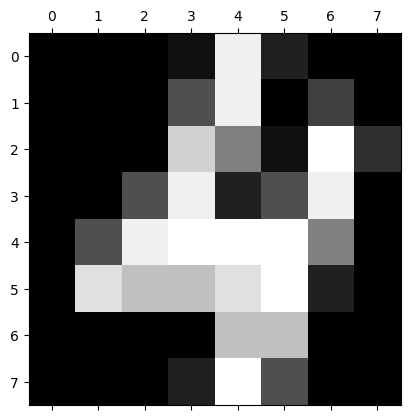

In [5]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[1001])
plt.show()

# KNN

In [6]:
digits['data'] = np.where(digits['data']>0,1,-1)

In [7]:
vectors = np.array(vectors)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(vectors,chars,test_size=0.20, random_state=42)

In [9]:
X_train.shape

(4800, 784)

In [10]:
X_test.shape

(1200, 784)

In [11]:
type(y_train[0]),len(y_train),len(y_test)

(str, 4800, 1200)

In [12]:
digits['data'].shape

(1797, 64)

In [3]:
def distance(order,point1,point2):   #generalized form of mikowski distance(manhattan=order1,euclidean=order2)
    return np.sum(np.fromiter((np.abs(e1-e2)**order for e1, e2 in zip(point1,point2)),dtype=point1[0].dtype))**(1/order)

def distances(order,point,data):
    distances_ls=[]
    for i in data:
        # distances_ls.append(distance(order,point,i))     #toooo slow O(n^2)->  t>10m
        distances_ls.append(np.linalg.norm(point-i,ord=order))
    return distances_ls

def neighbors_idx(k,distances):
    return np.argsort(distances)[:k]

def classify(index,data_classes):
    neighbors_class=[data_classes[i] for i in index]
    return max(set(neighbors_class), key = neighbors_class.count)
    
def predict_class(test_point,k,distances_ord,X_train,labels):
    train_data = X_train
    # Implement a KNN algorithm
    index_neighbors=neighbors_idx(k,distances(distances_ord,test_point,train_data))
    closest_class=classify(index_neighbors,labels)
    return closest_class

In [14]:
distances(2,X_test[0,:],X_train)[:4]

[20.09975124224178, 20.199009876724155, 25.45584412271571, 21.166010488516726]

In [15]:
neighbors_idx(2,distances(2,X_test[0,:],X_train)[:4])

array([0, 1], dtype=int64)

In [16]:
classify(np.array([0,1,2,3,4]),y_test)

'6'

In [27]:
from sklearn.metrics import mean_squared_error,confusion_matrix
from sklearn.preprocessing import LabelEncoder

def test(y_test,X_test,X_train,y_train,k):
    success = 0
    examples = X_test
    predictions=[]
    for e in range(len(examples)):
        # def predict(test_point,k,distances_ord,X_train,labels):
        predictions.append(predict_class(examples[e],k,2,X_train,y_train))
        if predictions[e] == y_test[e]:
            success += 1

    le=LabelEncoder()
    le.fit(y_test)
    y_true=le.transform(y_test)
    y_pred=le.transform(predictions)
    MSE=mean_squared_error(y_true,y_pred)   #to calculate error between actual values and predicted values
    CM=confusion_matrix(y_true,y_pred)
    return float(success) / len(examples),MSE,CM

In [28]:
acc,mse,cm=test(y_test,X_test,X_train,y_train,15)
acc,mse,cm

(0.9025,
 1.6425,
 array([[105,   0,   0,   1,   0,   1,   1,   0,   0,   0],
        [  0, 134,   0,   0,   0,   0,   0,   0,   0,   0],
        [  1,  17,  86,   1,   0,   0,   3,   6,   1,   0],
        [  0,   6,   1, 112,   0,   3,   0,   3,   0,   2],
        [  0,   5,   0,   0, 110,   0,   1,   0,   0,   3],
        [  1,   3,   0,   5,   1,  80,   3,   0,   0,   4],
        [  1,   2,   0,   0,   0,   0, 116,   0,   0,   0],
        [  0,   7,   0,   0,   1,   0,   0, 132,   0,   2],
        [  0,   7,   1,   6,   3,   1,   0,   1,  89,   3],
        [  2,   0,   0,   0,   3,   0,   1,   3,   0, 119]], dtype=int64))

Now testing for multiple k:

In [45]:
accs,mses=[],[]
ks=np.arange(1,21)
for k in ks:
    acc,mse,_=test(y_test,X_test,X_train,y_train,k)
    accs.append(acc)
    mses.append(mse)

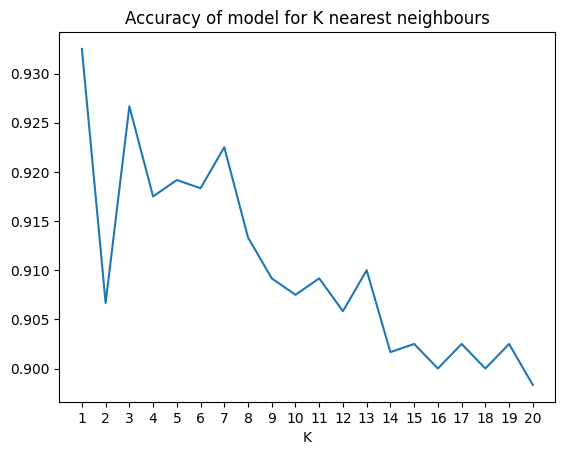

In [54]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(ks,accs)
plt.xlabel("K")
plt.xticks(ks)
plt.title("Accuracy of model for K nearest neighbours")
plt.show()

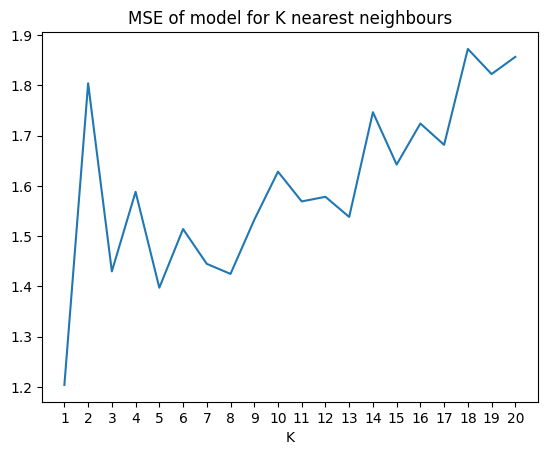

In [56]:
plt.figure()

plt.plot(ks,mses)
plt.xlabel("K")
plt.xticks(ks)
plt.title("MSE of model for K nearest neighbours")
plt.show()

From the comparison of MSE and accuracy, the best k is 5:

In [57]:
acc,mse,cm=test(y_test,X_test,X_train,y_train,5)
acc,mse,cm

(0.9191666666666667,
 1.3975,
 array([[106,   0,   0,   1,   0,   0,   1,   0,   0,   0],
        [  0, 134,   0,   0,   0,   0,   0,   0,   0,   0],
        [  1,  10,  98,   1,   0,   0,   2,   2,   1,   0],
        [  0,   1,   1, 117,   0,   3,   1,   2,   0,   2],
        [  0,   4,   0,   0, 106,   0,   1,   1,   0,   7],
        [  0,   2,   0,   2,   3,  83,   2,   1,   0,   4],
        [  1,   1,   0,   0,   0,   0, 117,   0,   0,   0],
        [  0,   6,   0,   0,   1,   0,   0, 133,   0,   2],
        [  1,   5,   3,   5,   1,   3,   1,   0,  89,   3],
        [  1,   0,   0,   1,   0,   0,   1,   5,   0, 120]], dtype=int64))

## Prostate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
prostate_data = pd.read_csv('prostate.csv')
prostate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lcavol   97 non-null     float64
 1   lweight  97 non-null     float64
 2   age      97 non-null     int64  
 3   lbph     97 non-null     float64
 4   svi      97 non-null     int64  
 5   lcp      97 non-null     float64
 6   gleason  97 non-null     int64  
 7   pgg45    97 non-null     int64  
 8   lpsa     97 non-null     float64
dtypes: float64(5), int64(4)
memory usage: 6.9 KB


In [3]:
prostate_data.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


https://hastie.su.domains/ElemStatLearn/datasets/prostate.info.txt

Prostate data info

Predictors (columns 1--8)

outcome (column 9)

In [4]:
#Divide the data set, and apply the K-NN. Test the accuracy, the training error, and the test error.
prost_train, prost_test, prost_lab_train, prost_lab_test = train_test_split(prostate_data.drop("lpsa",axis=1),prostate_data["lpsa"],test_size=0.20, random_state=42)
scaler=StandardScaler()
scaler.fit(prost_train)
prost_train=scaler.transform(prost_train)
prost_test=scaler.transform(prost_test)
prost_lab_train=prost_lab_train.to_numpy()
prost_lab_test=prost_lab_test.to_numpy()

In [5]:
type(prost_train),type(prost_test),type(prost_lab_train),type(prost_lab_train)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [11]:
prost_train.shape,prost_test.shape

((77, 8), (20, 8))

In [6]:
def distances(order,point,data):
    distances_ls=[]
    for i in data:
        # distances_ls.append(distance(order,point,i))
        distances_ls.append(np.linalg.norm(point-i,ord=order))
    return distances_ls

def neighbors_idx(k,distances):
    return np.argsort(distances)[:k]

def regress(index,labels):
    neighbors_class=[labels[i] for i in index]
    return sum(neighbors_class)/len(neighbors_class)
    
def predict_value(test_point,k,distances_ord,X_train,labels):
    train_data = X_train
    # Implement a KNN algorithm
    index_neighbors=neighbors_idx(k,distances(distances_ord,test_point,train_data))
    predicted_value=regress(index_neighbors,labels)
    return predicted_value

In [7]:
def test_regression(y_test,X_test,X_train,y_train,k):
    success = 0
    examples = X_test
    predictions=[]
    for e in range(len(examples)):
        # def predict(test_point,k,distances_ord,X_train,labels):
        predictions.append(predict_value(examples[e],k,2,X_train,y_train))
        if predictions[e] == y_test[e]:
            success += 1
    MSE=mean_squared_error(y_test,predictions)   #to calculate error between actual values and predicted values
    return MSE

In [8]:
test_regression(prost_lab_test,prost_test,prost_train,prost_lab_train,5)

0.5168366474909936

In [9]:
ks=np.arange(1,21)
mse=[]
for k in ks:
    mse.append(test_regression(prost_lab_test,prost_test,prost_train,prost_lab_train,k))

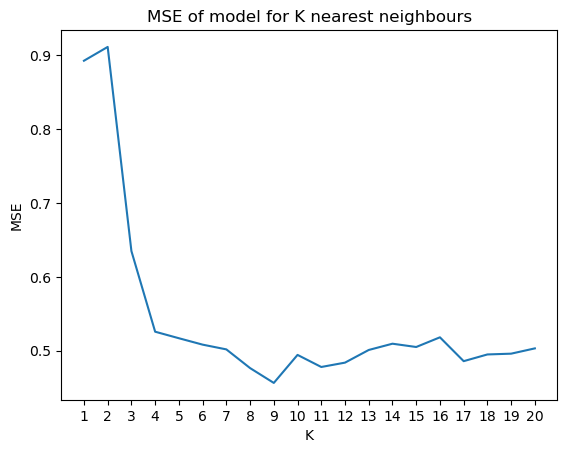

In [10]:
plt.figure()
plt.plot(ks,mse)
plt.xlabel("K")
plt.ylabel("MSE")
plt.xticks(ks)
plt.title("MSE of model for K nearest neighbours")
plt.show()

From the evaluation of the mean squared error,, the chosen value of k is 9.

# Perceptron

In [ ]:
data = [{'vector': v, 'char': c} for (v, c) in zip(vectors, chars)]

In [ ]:
def train(target_char, opposite_char, steps):
    train_data = data[:5000]
    train_data = [e for e in train_data if e['char'] in (target_char, opposite_char)]
    w = np.zeros(784)
    i = 0
    weights = w
    # Implement perceptron, remember:
    if z >= 0 and y == opposite_char:
        #TODO
    elif z < 0 and y == target_char:
        #TODO
    return w

def error(target_char, opposite_char,data,w):
    success = 0
    for e in data:
        z = np.dot(e['vector'], w)
        if (z >= 0 and e['char'] == target_char) or (z < 0 and e['char'] == opposite_char):
            success += 1
    return float(success) / len(data)

def test(target_char, opposite_char,weights):
    success = 0
    examples = data[5000:]

    examples = [e for e in examples if e['char'] in (target_char, opposite_char)]

    for e in examples:
        z = np.dot(e['vector'], weights)
        if (z >= 0 and e['char'] == target_char) or (z < 0 and e['char'] == opposite_char):
            success += 1

    return float(success) / len(examples)

In [ ]:
weights = train('1','2',100)

In [ ]:
test('1','2',weights)